# t-plot calculations

Another common characterisation method is the t-plot method. First, make sure the data is imported by running the previous notebook.

In [1]:
# import isotherms
%run import.ipynb

# import the characterisation module
import pygaps.characterisation as pgc

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


Besides an isotherm, this method requires a so-called thickness function, which
empirically describes the thickness of adsorbate layers on a non-porous surface
as a function of pressure. It can be specified by the user, otherwise the
"Harkins and Jura" thickness model is used by default. When the function is
called without any other parameters, the framework will attempt to find plateaus
in the data and automatically fit them with a straight line.

Let's look again at the our MCM-41 pore-controlled glass.

MCM-41
For linear region 1
The slope is 0.009732 and the intercept is 0.0002239, with a correlation coefficient of 1
The adsorbed volume is 0.00778 cm3/g and the area is 338.2 m2/g
For linear region 2
The slope is 0.001568 and the intercept is 0.008244, with a correlation coefficient of 0.9993
The adsorbed volume is 0.286 cm3/g and the area is 54.5 m2/g


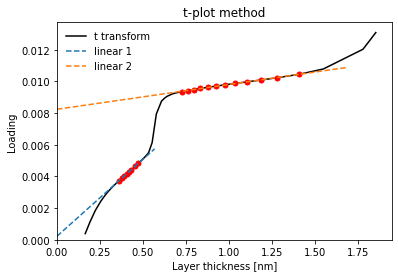

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
print(isotherm.material)
results = pgc.t_plot(isotherm, verbose=True)

The first line can be attributed to adsorption on the inner pore surface, while
the second one is adsorption on the external surface after pore filling. Two
values are calculated for each section detected: the adsorbed volume and the
specific area. In this case, the area of the first linear region corresponds to
the pore area. Compare the specific surface area obtained of 340 $m^2$ with the
360 $m^2$ obtained through the BET method previously.

In the second region, the adsorbed volume corresponds to the total pore volume
and the area is the external surface area of the sample.

We can get a better result for the surface area by attempting to have the first
linear region at a zero intercept.

MCM-41
For linear region 1
The slope is 0.01003 and the intercept is 0.0001048, with a correlation coefficient of 0.9996
The adsorbed volume is 0.00364 cm3/g and the area is 348.4 m2/g


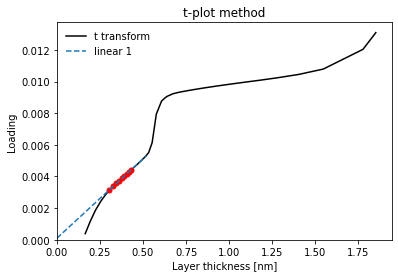

In [3]:
print(isotherm.material)
results = pgc.t_plot(
    isotherm, 
    thickness_model='Harkins/Jura', 
    t_limits=(0.3,0.44), 
    verbose=True
)

A near perfect match with the BET method. Of course, the method is only this
accurate in certain cases, see more info in the
[documentation of the module](../reference/characterisation/t_plot.rst). Let's
do the calculations for all the nitrogen isotherms, using the same assumption
that the first linear region is a good indicator of surface area.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.material, pgc.t_plot(isotherm, 'Harkins/Jura')))
    
[(x, f"{y['results'][0].get('area'):.2f}") for (x,y) in results]

[
    (<pygaps.Material 'MCM-41'>, '338.20'),
    (<pygaps.Material 'NaY'>, '199.77'),
    (<pygaps.Material 'SiO2'>, '249.14'),
    (<pygaps.Material 'Takeda 5A'>, '99.55'),
    (<pygaps.Material 'UiO-66(Zr)'>, '17.77')
]

We can see that, while we get reasonable values for the silica samples, all the
rest are quite different. This is due to a number of factors depending on the
material: adsorbate-adsorbent interactions having an effect on the thickness of
the layer or simply having a different adsorption mechanism. The t-plot requires
careful thought to assign meaning to the calculated values.

Since no thickness model can be universal, the framework allows for the
thickness model to be substituted with an user-provided function which will be
used for the thickness calculation, or even another isotherm, which will be
converted into a thickness model.

For example, using a carbon black type model:

Takeda 5A
For linear region 1
The slope is 0.0006789 and the intercept is 0.0101, with a correlation coefficient of 0.9939
The adsorbed volume is 0.351 cm3/g and the area is 23.59 m2/g


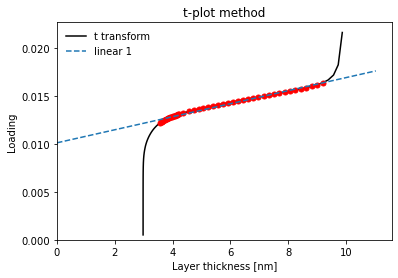

In [5]:
def carbon_model(relative_p):
    return 0.88*(relative_p**2) + 6.45*relative_p + 2.98

isotherm = next(i for i in isotherms_n2_77k if i.material=='Takeda 5A')
print(isotherm.material)
results = pgc.t_plot(isotherm, thickness_model=carbon_model, verbose=True)

Isotherms which do not use nitrogen can also be used, but one should be careful that the thickness model is well chosen.

More information about the functions and their use can be found in the [manual](../manual/characterisation.rst).